# Análise da Evasão Escolar e Rendimento Acadêmico: Desafios e Oportunidades de Melhoria
## Objetivo:
Este relatório tem como objetivo analisar os dados de rendimento escolar para identificar as causas da evasão escolar nas diferentes regiões do Brasil, correlacionando os índices de reprovação e abandono com fatores diversos. Através dessa análise, buscamos destacar os principais desafios enfrentados pelos estudantes e propor possíveis soluções para reduzir a evasão, especialmente nas áreas com maior necessidade de intervenção.

## 1.Importação dos dados

### Descrição das Colunas do Conjunto de Dados:
#### ibge_id: 
Representa o código IBGE (Instituto Brasileiro de Geografia e Estatística) da unidade da federação (estado) e dos municípios. Os valores possíveis para esta coluna são os códigos dos estados e municípios no Brasil, sendo que o código do estado é representado por 2 dígitos e, em seguida, o código do município. 

7: Brasil  
11: RO (Rondônia)  
12: AC (Acre)  
13: AM (Amazonas)  
14: RR (Roraima)  
15: PA (Pará)  
16: AP (Amapá)  
17: TO (Tocantins)  
21: MA (Maranhão)  
22: PI (Piauí)  
23: CE (Ceará)  
24: RN (Rio Grande do Norte)  
25: PB (Paraíba)  
26: PE (Pernambuco)  
27: AL (Alagoas)  
28: SE (Sergipe)  
29: BA (Bahia)  
31: MG (Minas Gerais)  
32: ES (Espírito Santo)  
33: RJ (Rio de Janeiro)  
35: SP (São Paulo)  
41: PR (Paraná)  
42: SC (Santa Catarina)  
43: RS (Rio Grande do Sul)  
50: MS (Mato Grosso do Sul)  
51: MT (Mato Grosso)  
52: GO (Goiás)  
53: DF (Distrito Federal)  

#### ano: 
Representa o ano de coleta do indicador selecionado, expresso com 4 dígitos.

#### dependencia_id: 
Refere-se à dependência administrativa da instituição de ensino. Os valores possíveis são:

0: Total (abrange todas as dependências administrativas)  
1: Federal    
2: Estadual  
3: Municipal  
4: Privada  
5: Pública  

#### localizacao_id: 
Representa a localização da escola, podendo ser classificada como:

0: Total (considera tanto escolas urbanas quanto rurais)  
1: Urbana  
2: Rural  

#### serie_id: 
Refere-se ao ano escolar dos alunos, com os seguintes valores possíveis:

1: 1º Ano do Ensino Fundamental (EF)  
2: 2º Ano do Ensino Fundamental (EF)  
3: 3º Ano do Ensino Fundamental (EF)  
4: 4º Ano do Ensino Fundamental (EF)  
5: 5º Ano do Ensino Fundamental (EF)  
6: 6º Ano do Ensino Fundamental (EF)  
7: 7º Ano do Ensino Fundamental (EF)  
8: 8º Ano do Ensino Fundamental (EF)  
9: 9º Ano do Ensino Fundamental (EF)  
10: 1º Ano do Ensino Médio (EM)  
11: 2º Ano do Ensino Médio (EM)  
12: 3º Ano do Ensino Médio (EM)  

#### aprovados: 
Percentual de alunos aprovados no ano escolar, com valor entre 0 e 100%.  

#### reprovados: 
Percentual de alunos reprovados no ano escolar, com valor entre 0 e 100%. 

### abandonos: 
Percentual de alunos que abandonaram o ano escolar, com valor entre 0 e 100%. 

In [1]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importando dados
df = pd.read_csv("Data.csv", sep = (";"))

In [3]:
# visualizando as primeiras 10 linhas do dataframe
df.head(10)

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos
0,11,2023,0,0,10,NaN,"89,1","6,5","4,4"
1,11,2023,0,1,10,NaN,"89,1","6,6","4,3"
2,11,2023,0,2,10,NaN,"89,4","5,4","5,2"
3,11,2023,1,0,10,NaN,"93,8","5,9","0,3"
4,11,2023,1,1,10,NaN,"94,2","5,6","0,2"
5,11,2023,1,2,10,NaN,"92,7","6,8","0,5"
6,11,2023,2,0,10,NaN,"88,5","6,5",5
7,11,2023,2,1,10,NaN,"88,6","6,6","4,8"
8,11,2023,2,2,10,NaN,"86,1","5,4","8,5"
9,11,2023,3,0,10,NaN,NaN,NaN,NaN


In [4]:
# tipo de dados
df.dtypes

ibge_id             int64
ano                 int64
dependencia_id      int64
localizacao_id      int64
serie_id            int64
matriculas        float64
aprovados          object
reprovados         object
abandonos          object
dtype: object

## 2. Limpeza dos dados

In [5]:
# removendo valores nulos
df = df.dropna(subset = ["aprovados", "reprovados", "abandonos"])

In [6]:
# transformando as colunas object p/ float
df.loc[:,"aprovados"] = df["aprovados"].astype(str).str.replace(",",".")
df.loc[:,"reprovados"] = df["reprovados"].astype(str).str.replace(",",".")
df.loc[:,"abandonos"] = df["abandonos"].astype(str).str.replace(",",".")

df["aprovados"] = df["aprovados"].astype(float)
df["reprovados"] = df["reprovados"].astype(float)
df["abandonos"] = df["abandonos"].astype(float)

In [7]:
# conferindo conversão
df.dtypes

ibge_id             int64
ano                 int64
dependencia_id      int64
localizacao_id      int64
serie_id            int64
matriculas        float64
aprovados         float64
reprovados        float64
abandonos         float64
dtype: object

## 3. Analisando os dados

In [8]:
# análise inicial
df.describe()

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos
count,1292.000000,1292.0,1292.000000,1292.000000,1292.000000,0.0,1292.000000,1292.000000,1292.000000
mean,29.517028,2023.0,2.441950,0.980650,11.000774,NaN,91.947523,5.262539,2.789938
std,12.730253,0.0,1.796943,0.814525,0.816654,NaN,6.479978,4.675664,3.060633
min,11.000000,2023.0,0.000000,0.000000,10.000000,NaN,63.200000,0.000000,0.000000
25%,21.000000,2023.0,1.000000,0.000000,10.000000,NaN,88.400000,1.800000,0.500000
50%,27.000000,2023.0,2.000000,1.000000,11.000000,NaN,93.400000,3.900000,2.000000
75%,41.000000,2023.0,4.000000,2.000000,12.000000,NaN,96.800000,7.300000,4.000000
max,53.000000,2023.0,5.000000,2.000000,12.000000,NaN,100.000000,29.600000,27.400000


## 3.1 Análise inicial
Com está primeira análise superficial podemos concluir/observar algumas informações:

### 1. Majoritariamente dados urbanos:
Por conta da média 0,98 estar mais próximo ao valor urbano (1) na coluna "localizacao_id" podemos concluir que os dados tratam-se majoritariamente destas localizações. Isto pode indicar falta de infroestrutura rural para coleta de informações e/ou um número maior de escolas nas áreas urbanas do país. 

Logo, nos questionamos "As taxas de abondono podem estar ligadas a falta de infroestrutura ou oportunidades de estudo no meio rural?".

### 2. Alta variação de taxas de aprovação, reprovação e abandono:
As médias gerais referentes as taxas de aprovação, reprovação e abandono parecem alinhadas, levando em consideração que a taxa de aprovação média é superior a 90% e a taxa de reprovação é quase o dobro da de abandono. Entretanto ao comparar com os valores min e max notamos uma grande discrepância nos dados chegando a valores como 27% de abandono.

Logo, nos questionamos "As poíticas de incentivo a educação têm sido abordadas de forma igualitária no país?"

## 3.2 Análises descritivas

In [9]:
# alteração de valores de localização (0,1,2) p/ (total, urbano, rural)
df["localizacao_id"] = df["localizacao_id"].astype(str)
df.loc[:,"localizacao_id"] = df["localizacao_id"].map({"0" : "total", "1" : "urbano", "2" : "rural"})
df.head(10)

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos
0,11,2023,0,total,10,NaN,89.1,6.5,4.4
1,11,2023,0,urbano,10,NaN,89.1,6.6,4.3
2,11,2023,0,rural,10,NaN,89.4,5.4,5.2
3,11,2023,1,total,10,NaN,93.8,5.9,0.3
4,11,2023,1,urbano,10,NaN,94.2,5.6,0.2
5,11,2023,1,rural,10,NaN,92.7,6.8,0.5
6,11,2023,2,total,10,NaN,88.5,6.5,5.0
7,11,2023,2,urbano,10,NaN,88.6,6.6,4.8
8,11,2023,2,rural,10,NaN,86.1,5.4,8.5
12,11,2023,4,total,10,NaN,92.8,6.7,0.5


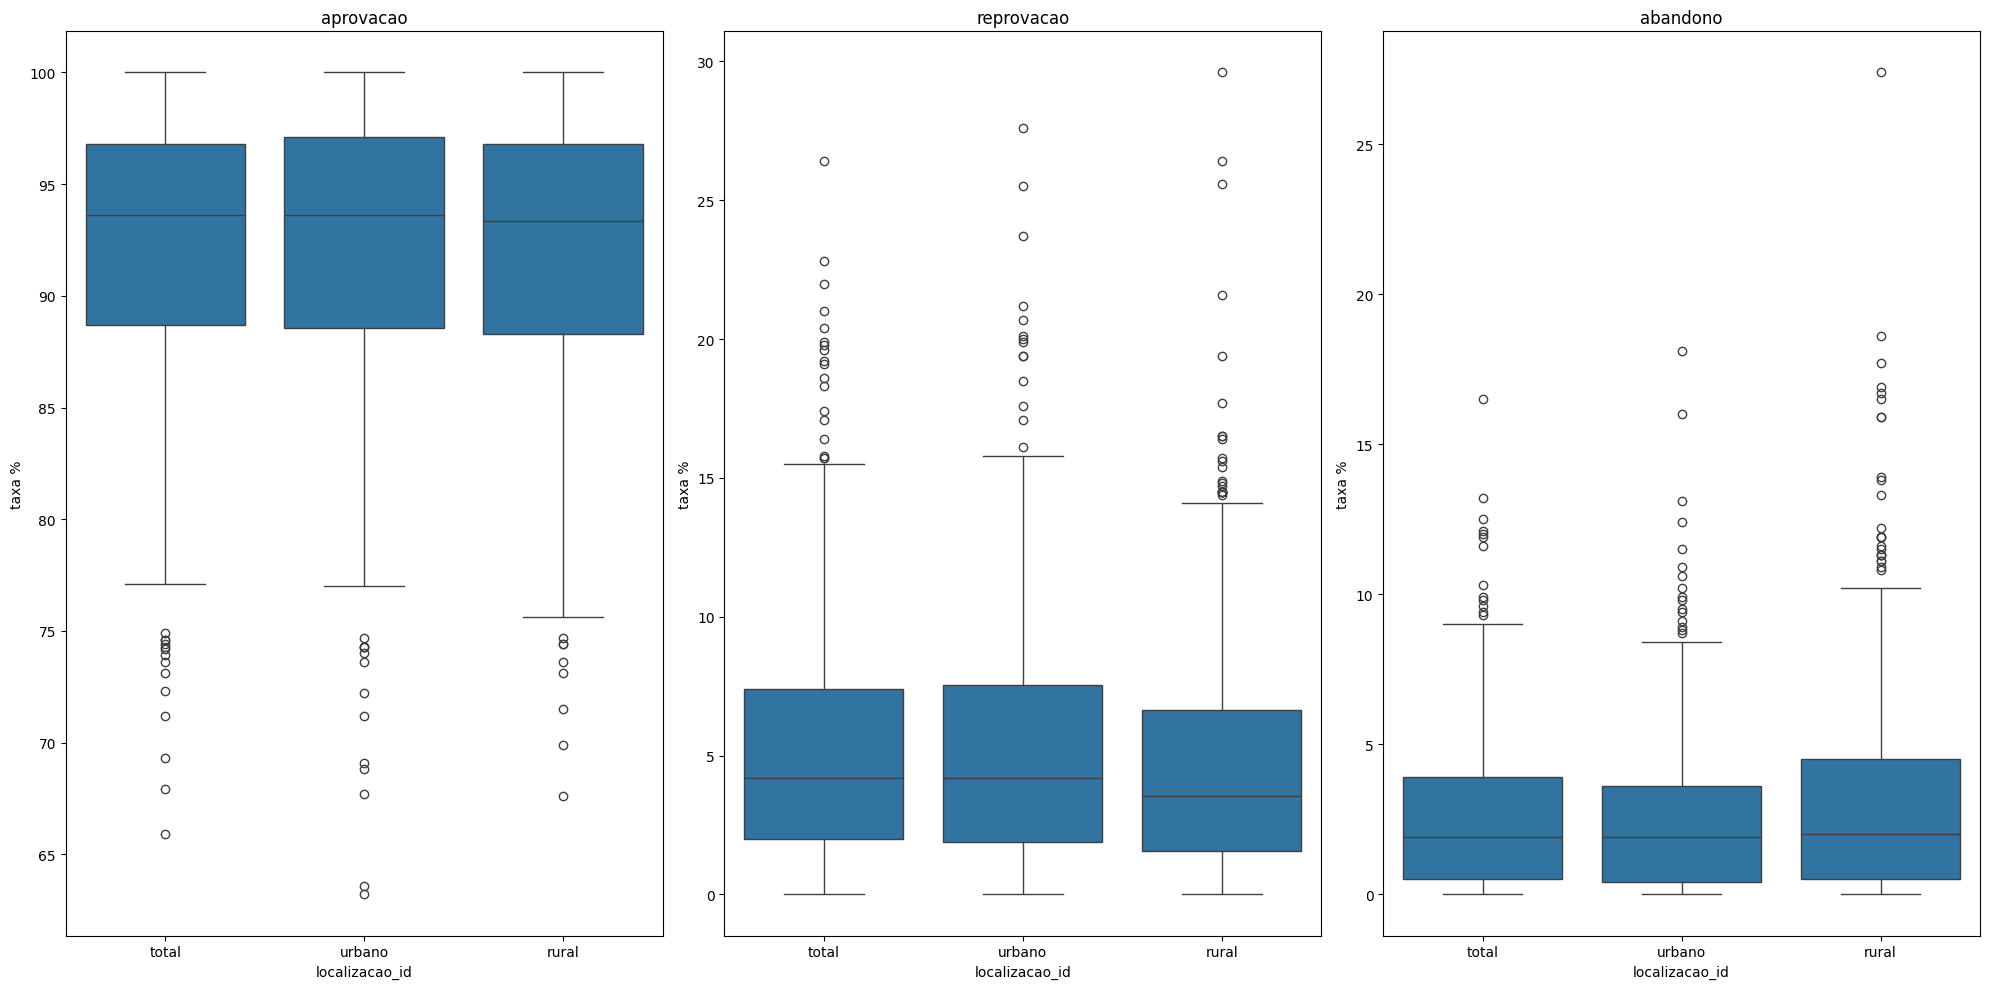

In [10]:
# configuração para plotar bloxplot (tipo de localizacao por taxa de aprovacao, reprovacao e abandono)

# configurando para criar três gráficos lado a lado
graficos, objetos = plt.subplots(1,3, figsize=(20,10))

# boxplot de aprovacao
sns.boxplot(x="localizacao_id", y="aprovados", data=df, ax=objetos[0])
objetos[0].set_title("aprovacao")
objetos[0].set_ylabel("taxa %")

# boxplot de reprovacao
sns.boxplot(x="localizacao_id", y="reprovados", data=df, ax=objetos[1])
objetos[1].set_title("reprovacao")
objetos[1].set_ylabel("taxa %")

# boxplot de abandonos
sns.boxplot(x="localizacao_id", y="abandonos", data=df, ax=objetos[2])
objetos[2].set_title("abandono")
objetos[2].set_ylabel("taxa %")

# ajustando espaçamento entre os gráficos
plt.tight_layout()

plt.show()

### 3.2.1 Análise boxplot por tipo de localização
Com a visualização gerada podemos observar que as taxas de aprovacão, reprovacão e abondono são muito semelhantes entre o âmbito rural e urbano, entretanto, no meio rural podemos observar uma quantidade maior de outliers o que significa uma variação mais discrepante em comparação com o meio urbano.

In [11]:
# alteração de valores de ibge_id para regiões
estados = {
    "7": "Brasil",       # Brasil
    "11": "Norte",       # RO (Rondônia)
    "12": "Norte",       # AC (Acre)
    "13": "Norte",       # AM (Amazonas)
    "14": "Norte",       # RR (Roraima)
    "15": "Norte",       # PA (Pará)
    "16": "Norte",       # AP (Amapá)
    "17": "Norte",       # TO (Tocantins)
    "21": "Nordeste",    # MA (Maranhão)
    "22": "Nordeste",    # PI (Piauí)
    "23": "Nordeste",    # CE (Ceará)
    "24": "Nordeste",    # RN (Rio Grande do Norte)
    "25": "Nordeste",    # PB (Paraíba)
    "26": "Nordeste",    # PE (Pernambuco)
    "27": "Nordeste",    # AL (Alagoas)
    "28": "Nordeste",    # SE (Sergipe)
    "29": "Nordeste",    # BA (Bahia)
    "31": "Sudeste",     # MG (Minas Gerais)
    "32": "Sudeste",     # ES (Espírito Santo)
    "33": "Sudeste",     # RJ (Rio de Janeiro)
    "35": "Sudeste",     # SP (São Paulo)
    "41": "Sul",         # PR (Paraná)
    "42": "Sul",         # SC (Santa Catarina)
    "43": "Sul",         # RS (Rio Grande do Sul)
    "50": "Centro-Oeste",# MS (Mato Grosso do Sul)
    "51": "Centro-Oeste",# MT (Mato Grosso)
    "52": "Centro-Oeste",# GO (Goiás)
    "53": "Centro-Oeste" # DF (Distrito Federal)
}
df["ibge_id"] = df["ibge_id"].astype(str)
df["estados"] = df["ibge_id"]
df.loc[:,"ibge_id"] = df["ibge_id"].map(estados)
df.head(10)

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos,estados
0,Norte,2023,0,total,10,NaN,89.1,6.5,4.4,11
1,Norte,2023,0,urbano,10,NaN,89.1,6.6,4.3,11
2,Norte,2023,0,rural,10,NaN,89.4,5.4,5.2,11
3,Norte,2023,1,total,10,NaN,93.8,5.9,0.3,11
4,Norte,2023,1,urbano,10,NaN,94.2,5.6,0.2,11
5,Norte,2023,1,rural,10,NaN,92.7,6.8,0.5,11
6,Norte,2023,2,total,10,NaN,88.5,6.5,5.0,11
7,Norte,2023,2,urbano,10,NaN,88.6,6.6,4.8,11
8,Norte,2023,2,rural,10,NaN,86.1,5.4,8.5,11
12,Norte,2023,4,total,10,NaN,92.8,6.7,0.5,11


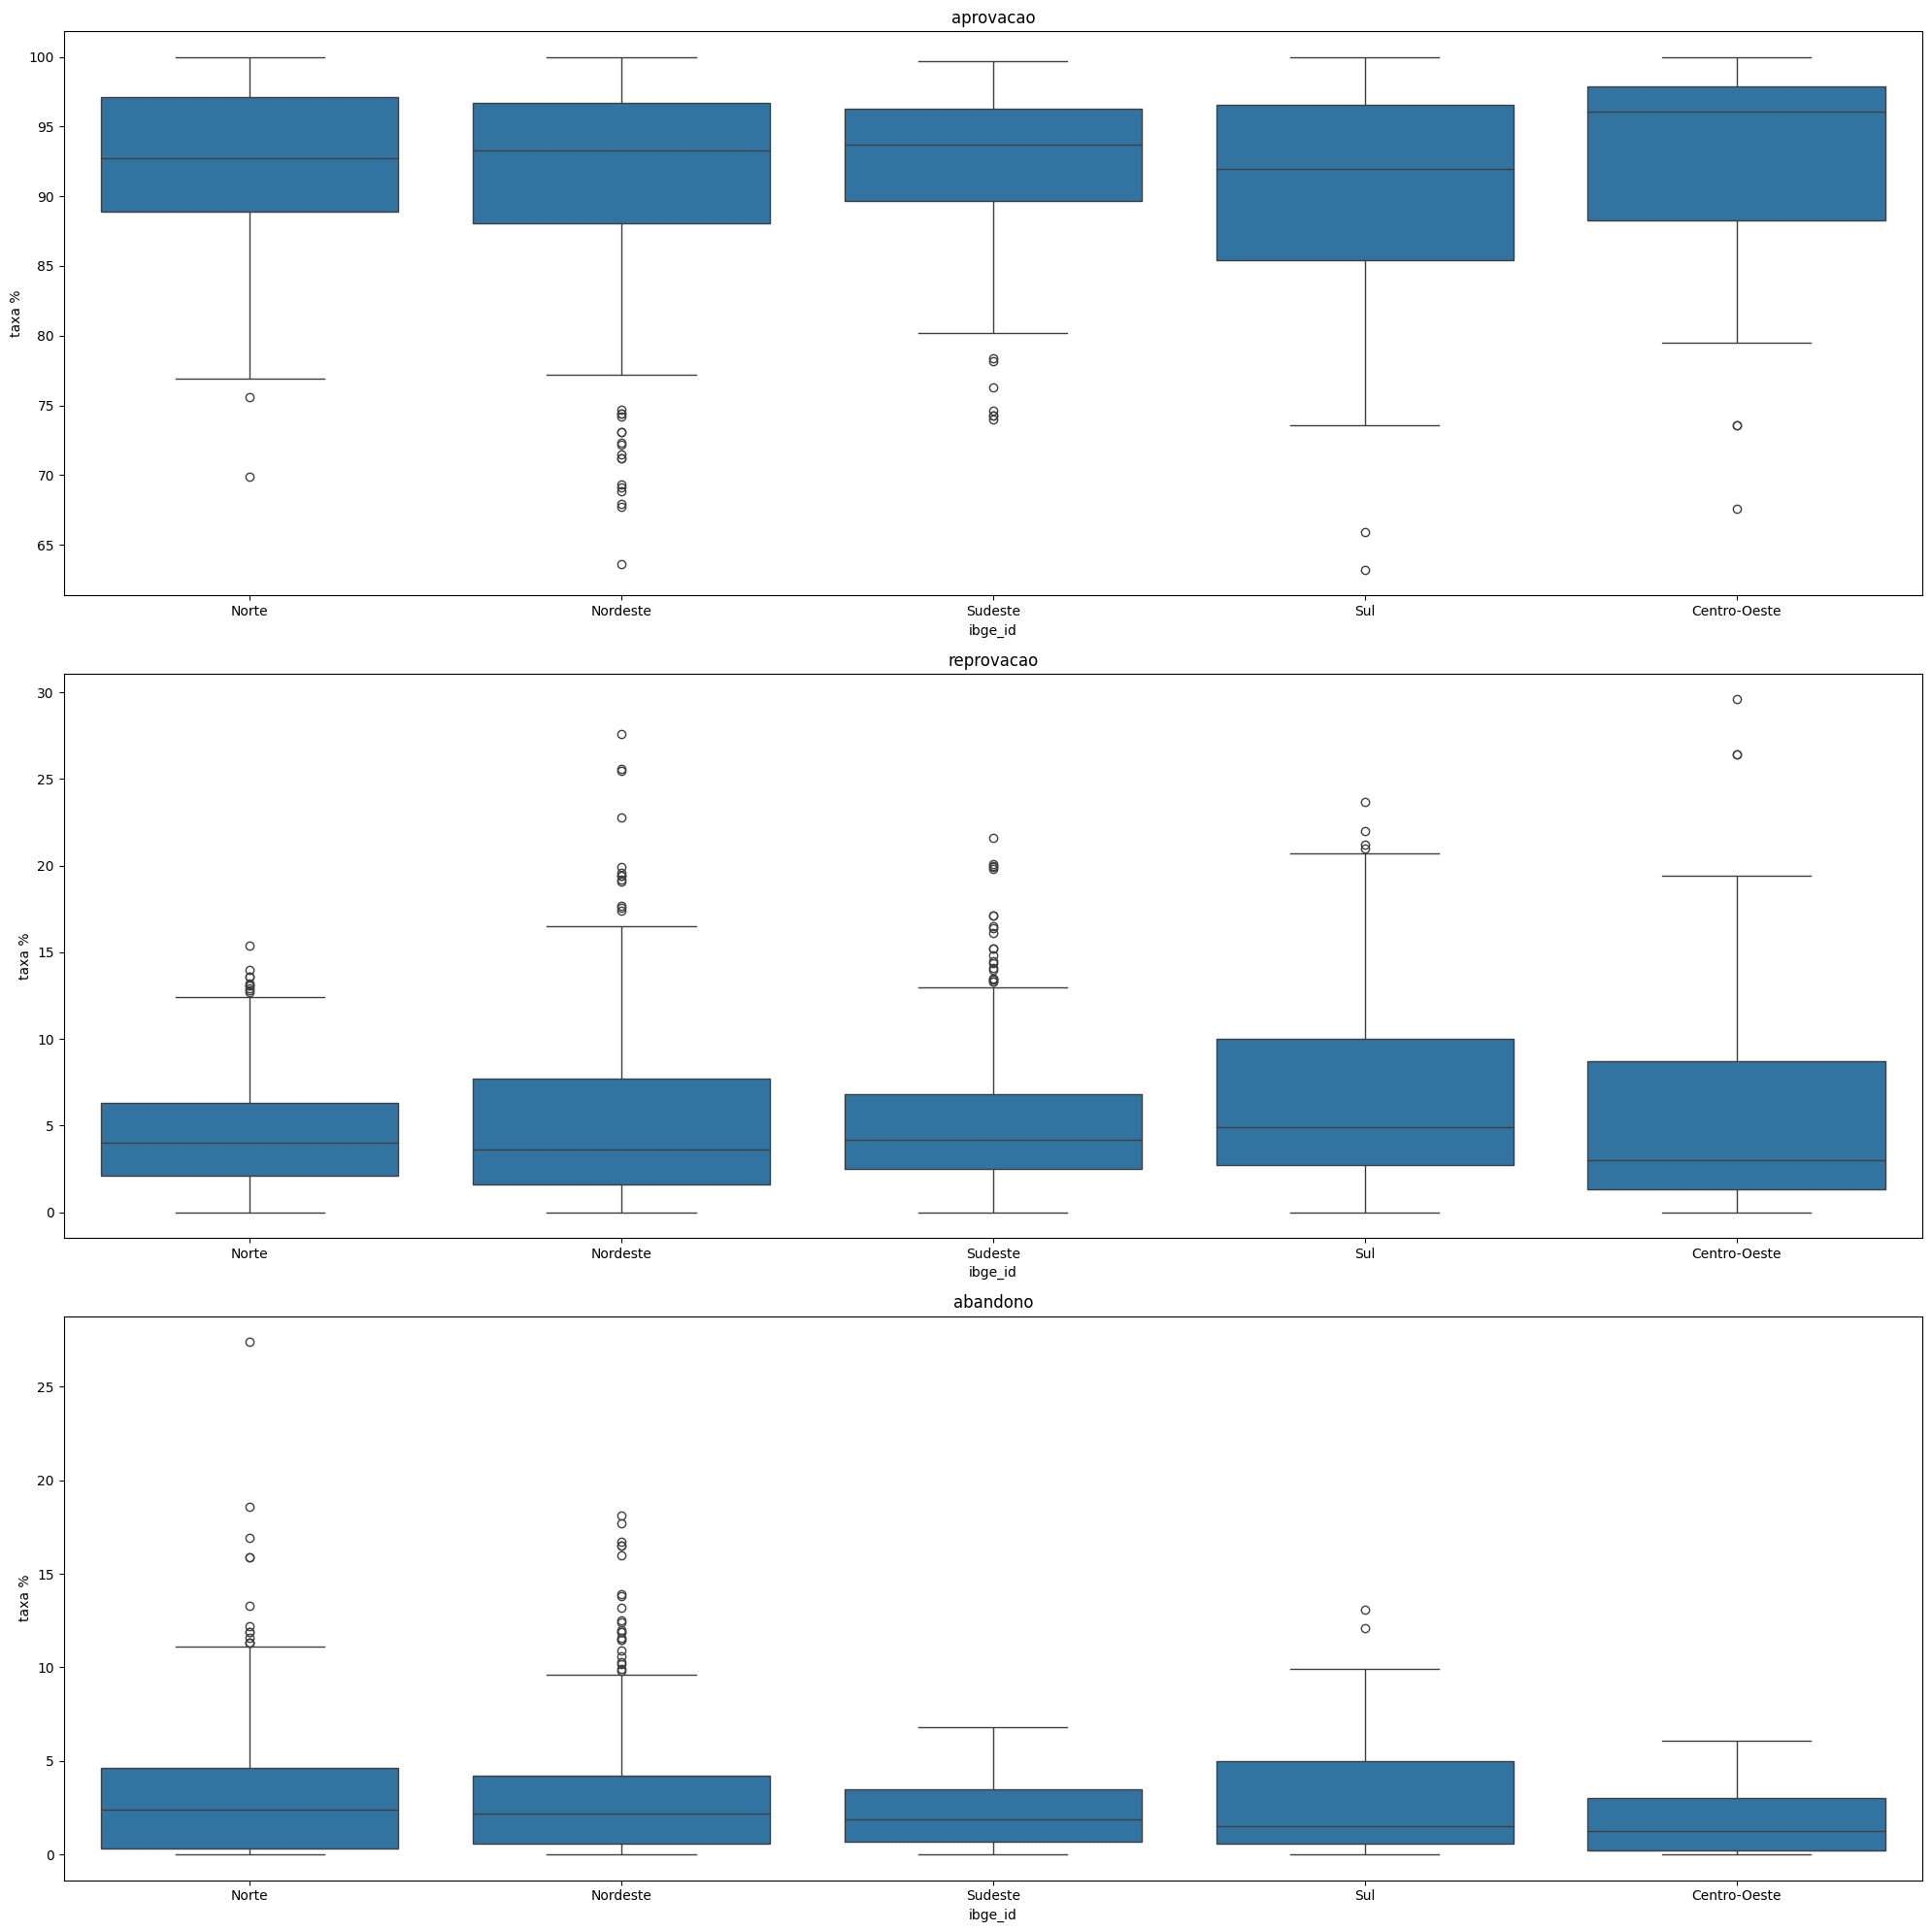

In [12]:
# configuração para plotar bloxplot (região do país por taxa de aprovacao, reprovacao e abandono)

# configurando para criar três gráficos
graficos, objetos = plt.subplots(3,1, figsize=(20,20))

# boxplot de aprovacao
sns.boxplot(x="ibge_id", y="aprovados", data=df, ax=objetos[0])
objetos[0].set_title("aprovacao")
objetos[0].set_ylabel("taxa %")

# boxplot de reprovacao
sns.boxplot(x="ibge_id", y="reprovados", data=df, ax=objetos[1])
objetos[1].set_title("reprovacao")
objetos[1].set_ylabel("taxa %")

# boxplot de abandonos
sns.boxplot(x="ibge_id", y="abandonos", data=df, ax=objetos[2])
objetos[2].set_title("abandono")
objetos[2].set_ylabel("taxa %")

# ajustando espaçamento entre os gráficos
plt.tight_layout()

plt.show()

### 3.2.2 Análise boxplot por região do país
Com a visualização gerada podemos observar que as taxas de aprovacao, reprovacao e abondono são realmente semelhantes entre as regiões do Brasil, entretanto podemos destarcar algumas observações:

#### 1. Região Nordeste é a que apresenta variação maior nas taxas de aprovação, reprovação e abandono.  
#### 2. Região Sudeste apresenta a maior concentração das taxas com alguns outliers, mas majoritariamente concentrados.  
#### 3. Região Sul possuí um resultado interessante, tendo em vista que sua mediana da taxa de abandono é relativamente baixa, entretanto, sua taxa de reprovação é alta seguida de uma baixa taxa de aprovação. Isso indica que políticas de incentivo a permanência escolar estão sendo realizadas, porém, em relação aprovação x reprovação seu resultado é "inferior" aos demais estados.
#### 4. Região Centro Oeste possuí uma mediana alta de aprovação e menor de reprovação e abandono, entretanto, seus quartis não se apresentam tão concentrados, logo, indicando maior variação com quantidades relevantes dos dados.  
#### 5. Região Norte possuí um resultado médio, todavia possuí outliers de abandono muito altos, o que gera alguma preocupação.

In [13]:
# Alterando valores da coluna criaada anteriormente (estados) para a sigla dos estados

estados2 = {
    "7": "BR",  # Brasil
    "11": "RO", # Rondônia
    "12": "AC", # Acre
    "13": "AM", # Amazonas
    "14": "RR", # Roraima
    "15": "PA", # Pará
    "16": "AP", # Amapá
    "17": "TO", # Tocantins
    "21": "MA", # Maranhão
    "22": "PI", # Piauí
    "23": "CE", # Ceará
    "24": "RN", # Rio Grande do Norte
    "25": "PB", # Paraíba
    "26": "PE", # Pernambuco
    "27": "AL", # Alagoas
    "28": "SE", # Sergipe
    "29": "BA", # Bahia
    "31": "MG", # Minas Gerais
    "32": "ES", # Espírito Santo
    "33": "RJ", # Rio de Janeiro
    "35": "SP", # São Paulo
    "41": "PR", # Paraná
    "42": "SC", # Santa Catarina
    "43": "RS", # Rio Grande do Sul
    "50": "MS", # Mato Grosso do Sul
    "51": "MT", # Mato Grosso
    "52": "GO", # Goiás
    "53": "DF"  # Distrito Federal
}

df.loc[:, "estados"] = df["estados"].map(estados2)
df.head(10)

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos,estados
0,Norte,2023,0,total,10,NaN,89.1,6.5,4.4,RO
1,Norte,2023,0,urbano,10,NaN,89.1,6.6,4.3,RO
2,Norte,2023,0,rural,10,NaN,89.4,5.4,5.2,RO
3,Norte,2023,1,total,10,NaN,93.8,5.9,0.3,RO
4,Norte,2023,1,urbano,10,NaN,94.2,5.6,0.2,RO
5,Norte,2023,1,rural,10,NaN,92.7,6.8,0.5,RO
6,Norte,2023,2,total,10,NaN,88.5,6.5,5.0,RO
7,Norte,2023,2,urbano,10,NaN,88.6,6.6,4.8,RO
8,Norte,2023,2,rural,10,NaN,86.1,5.4,8.5,RO
12,Norte,2023,4,total,10,NaN,92.8,6.7,0.5,RO


In [14]:
# Filtrando somente os estados do nordeste

df_nordeste = df[df["ibge_id"] == "Nordeste"]
df_nordeste.head(10)

,ibge_id,ano,dependencia_id,localizacao_id,serie_id,matriculas,aprovados,reprovados,abandonos,estados
124,Nordeste,2023,0,total,10,NaN,90.7,5.3,4.0,MA
125,Nordeste,2023,0,urbano,10,NaN,91.2,5.2,3.6,MA
126,Nordeste,2023,0,rural,10,NaN,88.0,5.8,6.2,MA
127,Nordeste,2023,1,total,10,NaN,89.3,9.4,1.3,MA
128,Nordeste,2023,1,urbano,10,NaN,90.5,8.2,1.3,MA
129,Nordeste,2023,1,rural,10,NaN,85.7,13.1,1.2,MA
130,Nordeste,2023,2,total,10,NaN,90.3,5.3,4.4,MA
131,Nordeste,2023,2,urbano,10,NaN,90.8,5.2,4.0,MA
132,Nordeste,2023,2,rural,10,NaN,87.5,5.9,6.6,MA
133,Nordeste,2023,3,total,10,NaN,98.7,0.2,1.1,MA


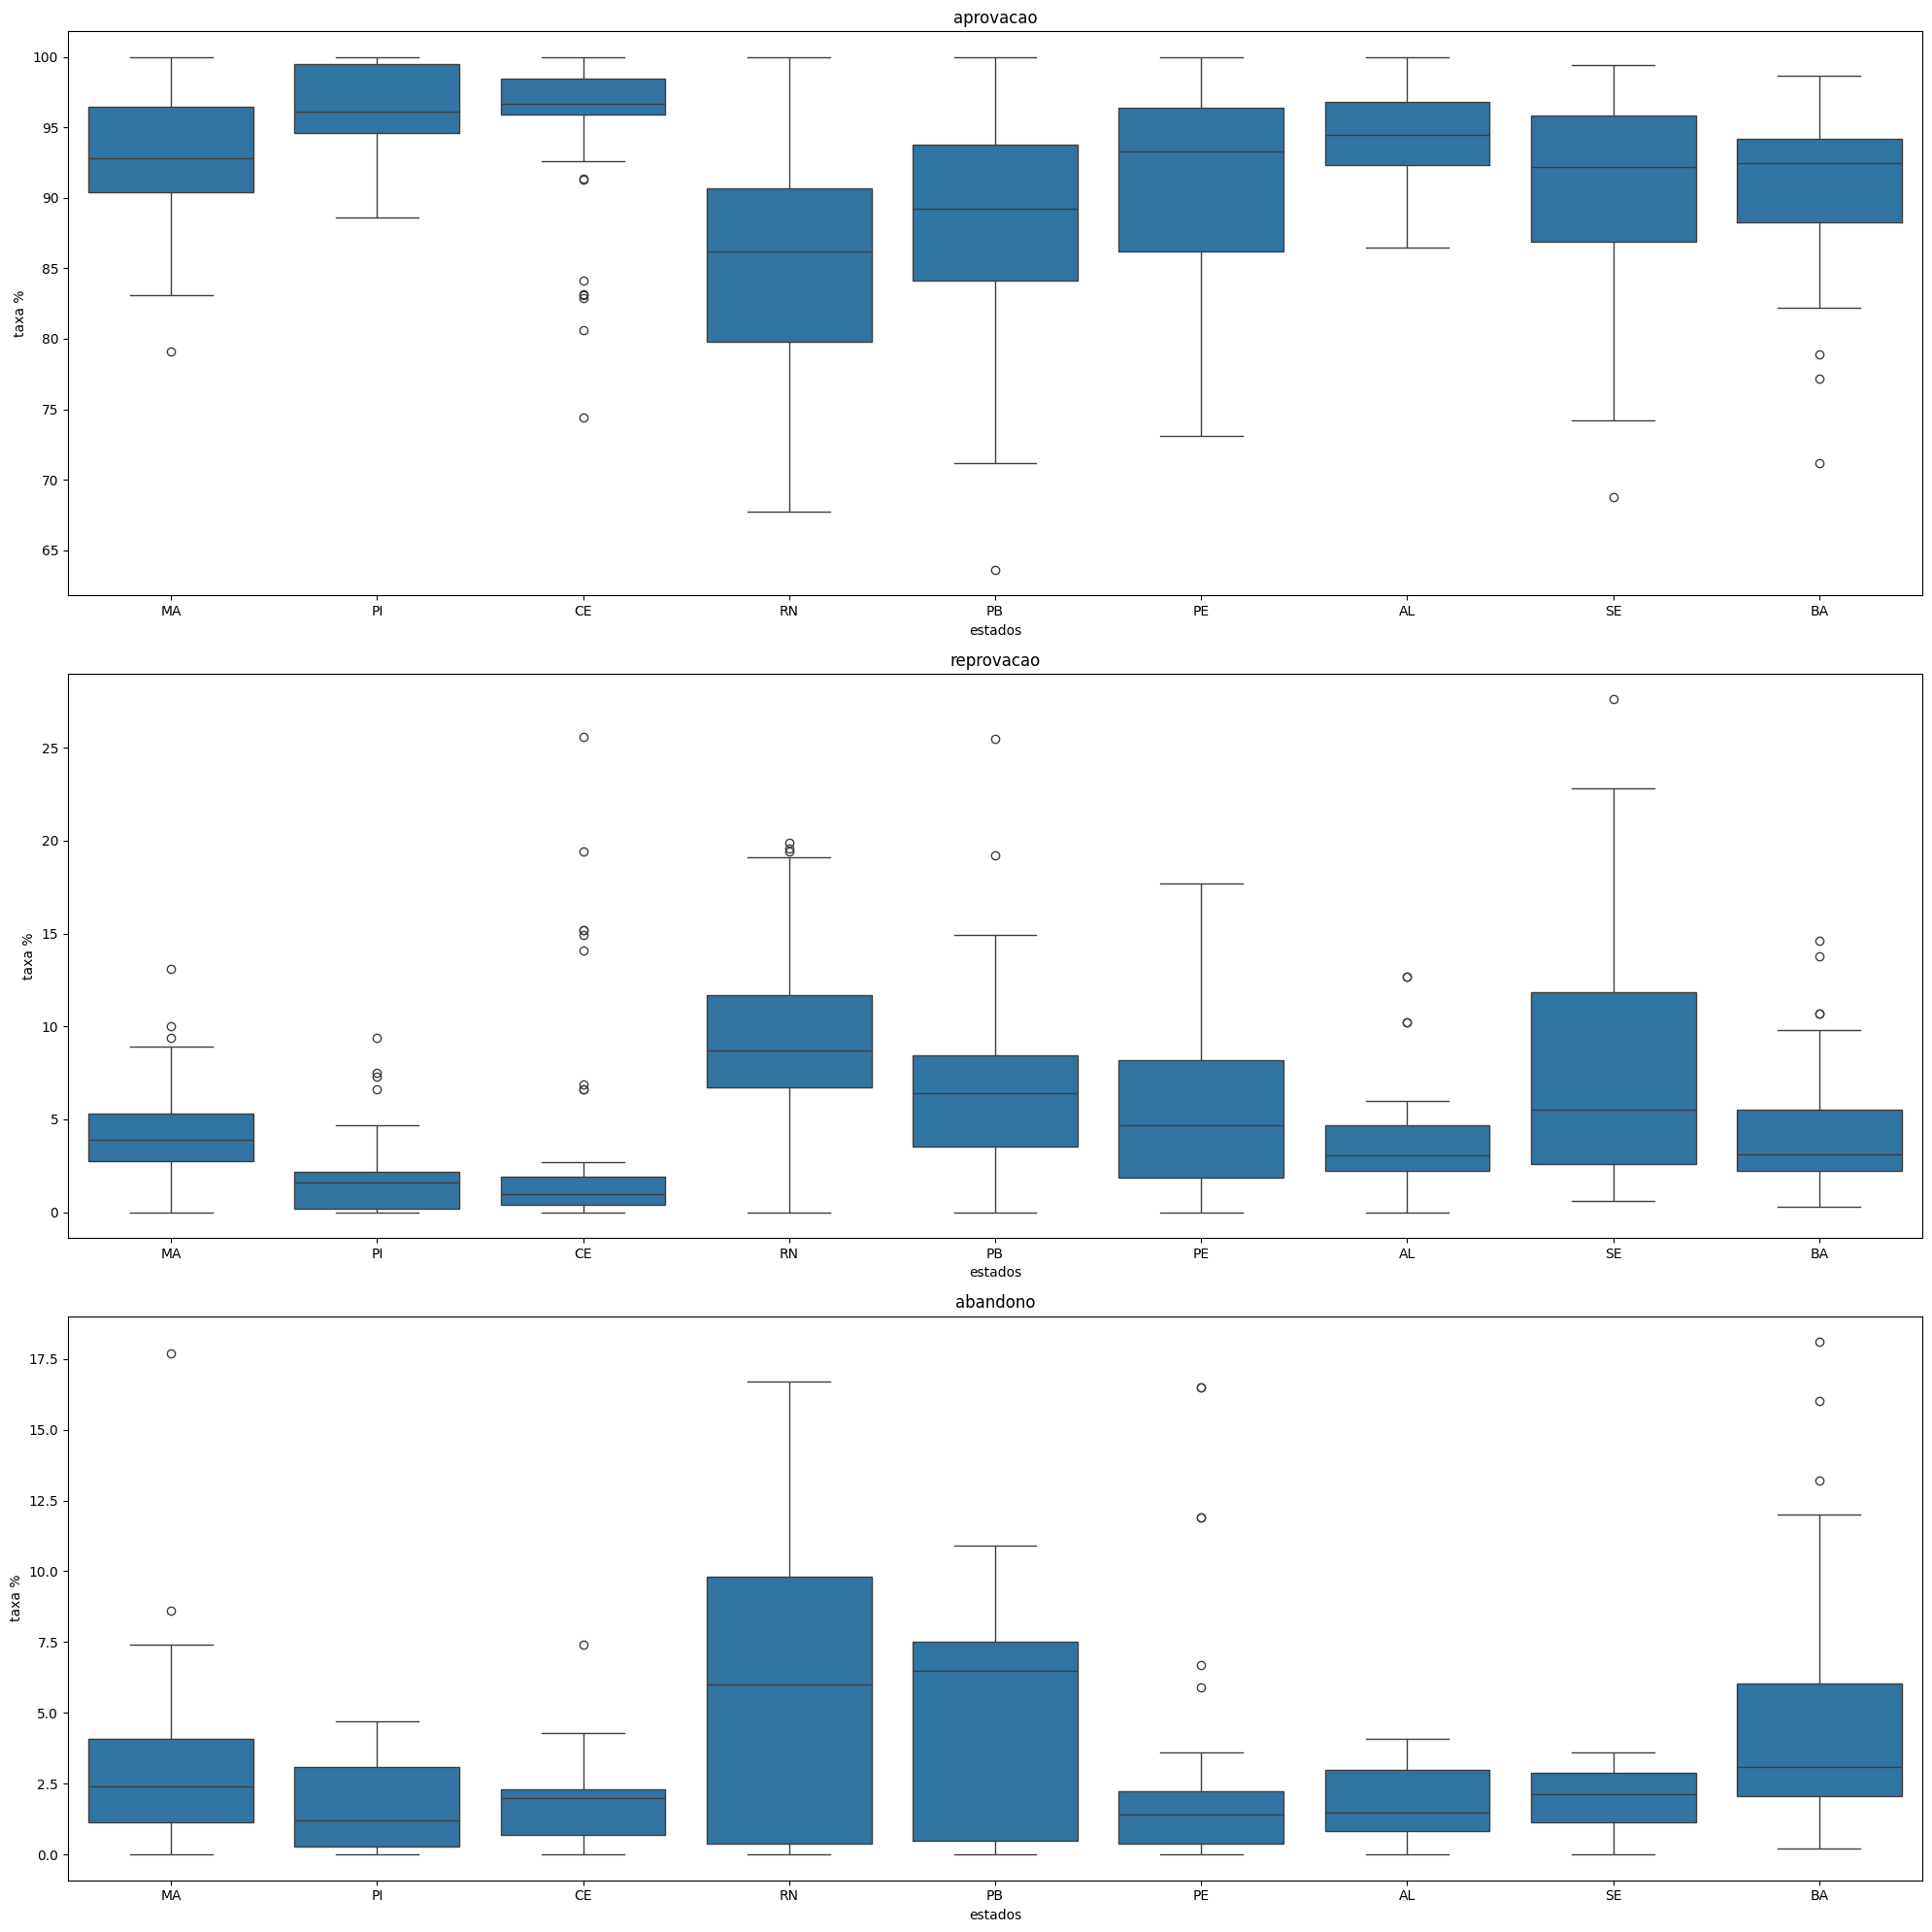

In [15]:
# configuração para plotar bloxplot (nordeste por taxa de aprovacao, reprovacao e abandono)

# configurando para criar três gráficos
graficos, objetos = plt.subplots(3,1, figsize=(20,20))

# boxplot de aprovacao
sns.boxplot(x="estados", y="aprovados", data=df_nordeste, ax=objetos[0])
objetos[0].set_title("aprovacao")
objetos[0].set_ylabel("taxa %")

# boxplot de reprovacao
sns.boxplot(x="estados", y="reprovados", data=df_nordeste, ax=objetos[1])
objetos[1].set_title("reprovacao")
objetos[1].set_ylabel("taxa %")

# boxplot de abandonos
sns.boxplot(x="estados", y="abandonos", data=df_nordeste, ax=objetos[2])
objetos[2].set_title("abandono")
objetos[2].set_ylabel("taxa %")

# ajustando espaçamento entre os gráficos
plt.tight_layout()

plt.show()

### 3.2.3 Análise boxplot do estado Nordeste

Com estes grárficos podemos realmente confirmar uma grande variação no Nordeste quanto as taxas de aprovação, reprovação e abandono. Destacando os seguintes pontos:

#### 1. Nos estados do Maranhão, Piauí, Ceará, Alagoas e Bahia mesmo com grande variações entre suas medianas, podemos destacar uma maior concentração entre suas taxas, principalmente nas de reprovação e abandono. Já quanto suas medianas, em geral, destacamos medianas altas de aprovação e baixas de reprovação e abandono.  
#### 2. Nos estados do Rio Grande do Norte e Paraíba notamos um resultado "inferior" em relação aos demais estados nordestinos, com baixa mediana de aprovação e altas medianas de reprovação e abandono. Além disso, principalmente quanto a taxa de abandono, suas variações são relevantes, indicando que políticas públicas para permanência escolar devem ser tomadas.  
#### 3. No estado do Sergipe notamos resultados medianos, com variações relativamente altas nas aprovações e abandonos.  

## 4. As análises realizadas são relativamente simples, mas para tais podemos recomendar algumas ações baseadas nos insights anteriores

### 1. Criação de políticas para diminuição da variação no meio rural:  
Segundo as taxas de aprovação, reprovação e abandono nos âmbitos urbanos e rurais, mesmo com certa semelhança, podemos destacar uma variação maior nos meios rurais além de resultados inferiores. Logo, cabe ao Estado criar e monitorar de forma sensata as políticas públicas a fim de evitar essa distinção.  

### 2. Criação de políticas para permanência escolar nos estados:  
Cabe ao Estado criar e monitorar políticas pública para equalizar a permanencia escolar nos estados, levando como exemplo o estado do Paraná. Um dos casos mais preocupantes seria o Norte, onde seus níveis de abandono superem as demais regiões e possuí outliers altíssimos.  

### 3. Adequação de políticas para diminuição de distinção entre os estados nordestinos:  
Notamos que, principalmente na região nordeste, há uma grande variação entre taxas de seus estados. Cabe ao Governo priorizar a equalização das mesmas usando como base os estados de resultado superior como o Ceará, Piauí e Maranhão.  

Obs. Em geral vale ressaltar que análises aqui presentes são baseadas em dados disponibilizados pelo portal QEdu no ano de 2023 e podem ser acessados atráves deste link: https://qedu.org.br/brasil/baixar-dados?7&brasil
